<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module00_LoadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 00 - Create Train and Test Sets

In this first module, we perform the following steps:

1. Load the data from Google Drive in two parts (the file is too big to load at once);
2. Exclude irrelevant variables or variables with too many missing values;
3. Rename variables in English and whenever possible with shorter names;
4. Perform correlation analysis on groups of variables. 

### 1 - Load Data



In [34]:
import pandas as pd

url_a = "https://drive.google.com/file/d/1prPbFSiXFTHmTHzXTGxy4HrtRxXUHhce/view?usp=sharing"
path_a = "https://drive.google.com/uc?export=download&id="+url_a.split("/")[-2]
base_df_a = pd.read_excel(path_a)
base_df_a.shape

(309999, 37)

In [35]:
url_b = "https://drive.google.com/file/d/1nGckSszPPifPvR3o5FeYaKArUYbfjHGn/view?usp=sharing"
path_b = "https://drive.google.com/uc?export=download&id="+url_b.split("/")[-2]
base_df_b = pd.read_excel(path_b)
base_df_b.shape

(327823, 37)

In [93]:
complete_set = base_df_a.append(base_df_b)
complete_set.shape

(637822, 37)

### 2 - Adjust Variables

In this section, we rename the variables in the dataset and then create three new ones: 

*   `student`: binary variable to indicate whether the borrower has other occupation outside of being a student;
*   `default`: binary varible -- 1 if deliquency period of the loan is superior to 360 days and 0 otherwise;
* `age`: age calculate from the birth year. 

---





In [94]:
# Student
complete_set = complete_set.assign(student = 1*(complete_set["DS_OCUPACAO"]=="Estudante"))

# Default
complete_set = complete_set.assign(default = 1*(complete_set["nu_dias_atraso"]>=360))

# Age
complete_set = complete_set[pd.to_numeric(complete_set["ANO_NASC"],errors='coerce').notna()]
complete_set = complete_set.assign(age = 2015 - (complete_set["ANO_NASC"]))

# Limiting the phases of the contract to include only individuals for which there is variation in defalut:
complete_set = complete_set.loc[complete_set["fase_contrato"] != "Carencia"] 
complete_set = complete_set.loc[complete_set["fase_contrato"] != "Utilizacao"] 
complete_set.shape



(454152, 40)

In [95]:
# Limiting the levels of NO_CURSO
complete_set["NO_CURSO"].value_counts(normalize=True).head(20)

top_20_degrees = ['DIREITO', 'ADMINISTRAÇÃO','PEDAGOGIA','ENGENHARIA CIVIL',
                  'ENFERMAGEM', 'CIÊNCIAS CONTÁBEIS', 'EDUCAÇÃO FÍSICA',
                  'PSICOLOGIA', 'FISIOTERAPIA', 'ENGENHARIA DE PRODUÇÃO',
                  'ODONTOLOGIA', 'ENGENHARIA MECÂNICA', 'ARQUITETURA E URBANISMO',
                  'NUTRIÇÃO', 'SERVIÇO SOCIAL', 'GESTÃO DE RECURSOS HUMANOS',
                  'FARMÁCIA', 'BIOMEDICINA', 'ENGENHARIA ELÉTRICA', 'MEDICINA']

complete_set.NO_CURSO[~(complete_set["NO_CURSO"].isin(top_20_degrees))] = "OUTROS"

complete_set["NO_CURSO"].value_counts(normalize = True).head(22)

            



OUTROS                        0.213860
DIREITO                       0.126290
ADMINISTRAÇÃO                 0.107099
PEDAGOGIA                     0.079614
ENGENHARIA CIVIL              0.063170
ENFERMAGEM                    0.057959
CIÊNCIAS CONTÁBEIS            0.045863
EDUCAÇÃO FÍSICA               0.042567
PSICOLOGIA                    0.036043
FISIOTERAPIA                  0.026035
ENGENHARIA DE PRODUÇÃO        0.025044
ODONTOLOGIA                   0.021682
ENGENHARIA MECÂNICA           0.020605
ARQUITETURA E URBANISMO       0.020476
NUTRIÇÃO                      0.020242
SERVIÇO SOCIAL                0.019773
GESTÃO DE RECURSOS HUMANOS    0.017223
FARMÁCIA                      0.016268
BIOMEDICINA                   0.014414
ENGENHARIA ELÉTRICA           0.013242
MEDICINA                      0.012529
Name: NO_CURSO, dtype: float64

In [96]:
# Limiting the levels of occupation

complete_set["DS_OCUPACAO"].value_counts(normalize=True).head(20)
complete_set.DS_OCUPACAO[complete_set["DS_OCUPACAO"]!= "Estudante"] = "OUTRAS"
complete_set["DS_OCUPACAO"].value_counts(normalize=True).head(20)



OUTRAS       0.54083
Estudante    0.45917
Name: DS_OCUPACAO, dtype: float64

In [97]:
# Limiting the levels of semester_enroll


top_semesters = ['12014', '12013', '22014', '22013', '12012', '22012']

complete_set.NU_ANO_SEMESTRE_INSCRICAO.loc[~(complete_set["NU_ANO_SEMESTRE_INSCRICAO"].isin(top_semesters))] = "before 2012"

complete_set["NU_ANO_SEMESTRE_INSCRICAO"].value_counts(normalize=True).head(20)



12014          0.234159
12013          0.232528
22013          0.140453
22014          0.128682
12012          0.122186
22012          0.087462
before 2012    0.054530
Name: NU_ANO_SEMESTRE_INSCRICAO, dtype: float64

In [98]:
new_names ={"NU_ANO_SEMESTRE_INSCRICAO":"semester_enroll",
            "SG_SEXO":"gender",
            "DS_OCUPACAO":"occupation",
            "DS_RACA_COR" : "ethnicity",
            "NU_ANO_CONCLUSAO_ENSINO_MEDIO":"high_school_endyear",
            "SG_UF_CURSO": "state_course",
            "QT_SEMESTRES_CURSO": "n_sem_course",
            "VL_SEMESTRE_COM_DESCONTO": "tuition_discounted",
            "NU_PERCENT_SOLICITADO_FINANC":"perc_requested",
            "VL_FINANC_RECURSO_ALUNO":"student_resource",
            "ANO_NASC":"birth_year",
            "DS_ESTADO_CIVIL":"marital_status", 
            "VL_RENDA_PESSOAL_BRUTA_MENSAL": "personal_income",
            "VL_RENDA_FAMILIAR_BRUTA_MENSAL": "family_income",
            "ST_ENSINO_MEDIO_ESCOLA_PUBLICA": "public_hs",
            "NO_CURSO": "degree",
            "QT_SEMESTRE_CONCLUIDO": "n_completed_sem",
            "VL_SEMESTRE_ATUAL": "tuition_current",
            "VL_FINANCIADO_SEMESTRE": "loan_value_sem",
            "fase_contrato": "contract_phase",
            "vl_divida": "total_debt",            
            "VL_AVALIACAO_IGC": "igc",
            "VL_FAIXA_CPC": "cpc",
            "VL_FAIXA_CC": "cc",
            "QT_SEMESTRE_FINANCIAMENTO": "sem_funded",
            "QT_MEMBRO": "fam_size",
            "VL_RENDA_PER_CAPITA":"income_pc",
            "NU_PERCENTUAL_COMPROMETIMENTO":"inc_prop",
            "VL_TOTAL_FINANCIAMENTO":"loan_value",
            "VL_LIMITE_GLOBAL":"loan_limit",
            "dt_inicio_cont":"date_contract"
}

complete_set = complete_set.rename(index=str, columns=new_names)
print(complete_set.columns)

Index(['semester_enroll', 'gender', 'occupation', 'marital_status',
       'family_income', 'personal_income', 'NO_MUNICIPIO', 'SG_UF',
       'ethnicity', 'public_hs', 'high_school_endyear',
       'NU_SEMESTRE_REFERENCIA', 'state_course', 'degree', 'igc', 'cpc', 'cc',
       'n_sem_course', 'n_completed_sem', 'sem_funded',
       'QT_MESES_FINANC_SEMESTRE_ATUAL', 'fam_size', 'income_pc',
       'VL_SEMESTRE_SEM_DESCONTO', 'tuition_discounted', 'tuition_current',
       'inc_prop', 'perc_requested', 'loan_value_sem', 'student_resource',
       'loan_value', 'loan_limit', 'date_contract', 'contract_phase',
       'nu_dias_atraso', 'total_debt', 'birth_year', 'student', 'default',
       'age'],
      dtype='object')


### 3 - Clean Dataset

In this section we drop unecessary variables, deal with wrong entries and outliers, drop NA's and adjust variable types.

Most of the variables were dropped due to inconsistencies and missing data. `nu_dias_atraso` was dropped as it was used to create the binary target variable `default`.

In [99]:
variables_to_drop = ["NO_MUNICIPIO", # municipality
                     "SG_UF", # state
                     "VL_SEMESTRE_SEM_DESCONTO", # value of semester without discount
                     "NU_SEMESTRE_REFERENCIA", # semester of reference
                     "nu_dias_atraso", # period of deliquency
                     "QT_MESES_FINANC_SEMESTRE_ATUAL", # number of months for loans
                     "cpc", # university evaluation
                     "cc"] # university evaluation

complete_set_clean = complete_set.drop(variables_to_drop, axis = 1)                

The variable `loan_value_sem` (value of loan in the semester) has over 7,000 entries that are over 99 milion reais. We assume they are coding errors and recalculate them to be the equal to the value of the tuition (`tuition_current`) times the percentage of tuition requested as a loan (`perc_requested`). We also eliminate 4 outliers from `family_income`. Finally we filter `age` to include values ranging between 10 and 100 years old. 



In [100]:
import numpy as np

complete_set_clean['loan_value_sem'] = np.where((complete_set_clean.loan_value_sem > 300000), 
                                          (complete_set_clean["perc_requested"]/100 * complete_set_clean["tuition_current"]), 
                                          complete_set_clean.loan_value_sem)

In [101]:
complete_set_clean = complete_set_clean.loc[(complete_set_clean['family_income'] < 100000)] 

In [102]:
complete_set_clean = complete_set_clean.loc[(complete_set_clean['age'] < 100) & (complete_set_clean['age'] > 10)] 

For the variables in the list below, we drop NAs, as they do not comprise a large share of observations. After this step, we end up with 620,919 instances. 

In [103]:
complete_set_clean = complete_set_clean.dropna(subset=["semester_enroll",
                                                      "gender",
                                                       "occupation",
                                                       "marital_status",
                                                       "ethnicity",
                                                       "public_hs",
                                                       "state_course",
                                                       "degree",
                                                       "igc",
                                                       "contract_phase",
                                                       "high_school_endyear"])

The last step is adjusting some variable types. 

In [104]:
import datetime as dt
              
complete_set_clean["date_contract"]= complete_set_clean["date_contract"].map(dt.datetime.toordinal)
complete_set_clean = complete_set_clean.astype({"semester_enroll":str, "igc":'int64'})

 ### 4 - Correlation Matrix

In this section, we perform a quick correlation analysis. The only variable to be dropped is `tuition_discounted`, since it has perfect correlation with another variable (`tuition_current`). The remainder will be subject to further analysis in the future. 

In [105]:
corr_matrix = complete_set_clean.corr()
corr_matrix['default'].sort_values(ascending=False, key=pd.Series.abs)

default                1.000000
family_income         -0.245497
income_pc             -0.223941
n_sem_course          -0.180687
perc_requested         0.180169
student_resource      -0.175306
loan_value            -0.143912
tuition_discounted    -0.132852
tuition_current       -0.131339
sem_funded            -0.122057
fam_size              -0.109477
igc                   -0.094080
inc_prop               0.089520
loan_limit            -0.088000
student               -0.074627
loan_value_sem        -0.073557
total_debt            -0.069333
n_completed_sem       -0.044509
personal_income       -0.028472
date_contract          0.010705
high_school_endyear    0.010702
Name: default, dtype: float64

For the analysis, two subsets were created: 

* `corr_income`: containing variables related to family income;
* `corr_tuition`: containing variables related to tuition value.

In [106]:
corr_income = complete_set_clean[['family_income', 'income_pc', 'fam_size', 'default']].copy()
corr_tuition = complete_set_clean[['tuition_discounted', 'tuition_current', 'loan_limit', 'loan_value_sem', 'loan_value', 'perc_requested', 'default']].copy()

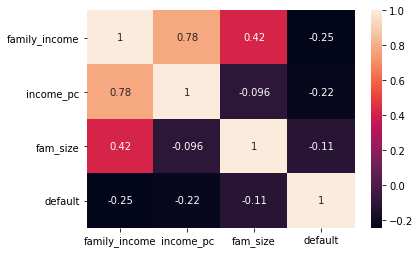

In [107]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = corr_income.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

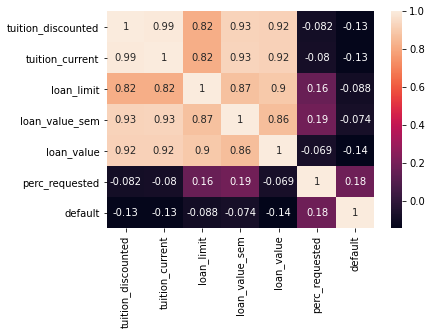

In [108]:
corrMatrix = corr_tuition.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [109]:
complete_set_clean = complete_set_clean.drop("tuition_discounted", axis=1)

### 5 - Creat Train and Test Sets

In this section we will create the training and test set using the function *train_test_split* from Scikit-Learn. Two important considerations about our choice:

* Our dataset is a sample provided by the Brazilian Governent and will not be updated. Therefore, we chose not to be concerned about future splits with updated data;

* Our original data includes 637,822 instances. After cleaning the dataset, we still have 620,919 instances. Thus, we assume it is big enough and do not employ stratified sampling.

In [110]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(complete_set_clean, test_size=0.2, random_state=42)

### 6 - Download Sets

In [111]:
from google.colab import files

# Training dataset
train.to_csv('train.csv', index=False)
files.download('train.csv')

# Test dataset
test.to_csv('test.csv', index=False)
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>